In [16]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [17]:
# pip install tensorflow==2.15.0
# pip install keras==3.0.5

In [18]:
import os
import cv2 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [19]:
# tf.__version__
keras.__version__

'3.0.5'

# Load MNIST dataset

In [20]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Show the img data

In [21]:
image_index = 2
image = X_train[image_index]

In [22]:
image = image.reshape(28, 28)

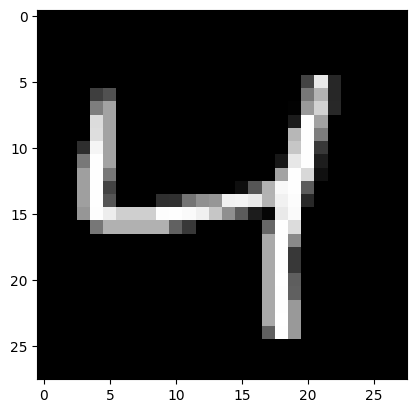

In [23]:
plt.imshow(image, cmap='gray')
plt.show()

# Normalize the pixel values

In [24]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

# Model Building

In [25]:
num_classes = 10

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [26]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
  35/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2118 - loss: 2.1216

I0000 00:00:1711723009.976785      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711723009.993222      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.4398

W0000 00:00:1711723016.676045      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8589 - loss: 0.4395 - val_accuracy: 0.9821 - val_loss: 0.0572
Epoch 2/10
  51/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9674 - loss: 0.1168

W0000 00:00:1711723018.012078      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9746 - loss: 0.0897 - val_accuracy: 0.9869 - val_loss: 0.0445
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9811 - loss: 0.0647 - val_accuracy: 0.9922 - val_loss: 0.0261
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9846 - loss: 0.0534 - val_accuracy: 0.9917 - val_loss: 0.0259
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9868 - loss: 0.0453 - val_accuracy: 0.9917 - val_loss: 0.0266
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9889 - loss: 0.0379 - val_accuracy: 0.9913 - val_loss: 0.0280
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0360 - val_accuracy: 0.9944 - val_loss: 0.0184
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9904 - loss: 0.0335 - val_accuracy: 0.9931 - val_loss: 0.0242
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9903 - loss: 0.0327 - val_accurac

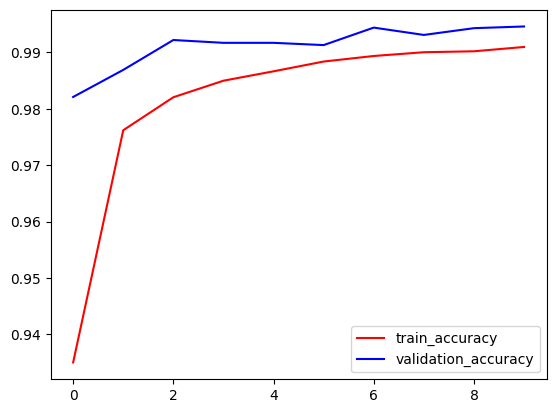

In [28]:
plt.plot(r.history['accuracy'], color='red', label='train_accuracy')
plt.plot(r.history['val_accuracy'], color='Blue', label='validation_accuracy')
plt.legend()
plt.show()

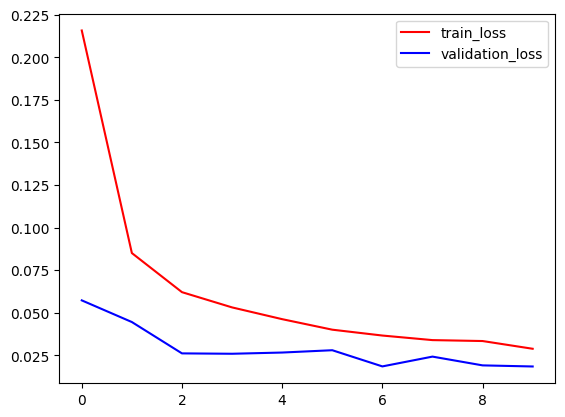

In [29]:
plt.plot(r.history['loss'], color='red', label='train_loss')
plt.plot(r.history['val_loss'], color='Blue', label='validation_loss')
plt.legend()
plt.show()

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss : {loss : .2f}\nAccuracy : {accuracy : .2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9933 - loss: 0.0218
Loss :  0.02
Accuracy :  0.99


In [31]:
model.save('/kaggle/working/my_model.h5')